# ANALYSE ET PREDICTION DES INFECTIONS COVID-19

<b>Objectif :</b>  Explorer les données pour en extraire des connaissances afin d'aider la communauté à mieux comprendre la propagation du COVID-19

In [1]:
# import des bibliothèques
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
import statsmodels.api
from scipy.stats import chi2_contingency
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import NMF
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.cluster import AgglomerativeClustering
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
#from sklearn.decomposition import PCA
filename = "clean-hubei.csv"
filename2 = "latestdata.csv"

In [2]:
#On récupère les données
df_covid19 = pd.read_csv(filename, sep=",", header=0) #lecture de table sans header

In [3]:
df_covid19

,id,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
0,1,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
1,2,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
2,3,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
3,4,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
4,5,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
5,6,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
6,7,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
7,8,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
8,9,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
9,10,15-88,male,Wuhan City,Hubei,China,30.596415,114.279780,point,- 18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100


In [4]:
#latest = pd.read_csv(filename2, sep=",", header=0)
#latest.columns

### Analyse préliminaire

In [5]:
# dimension du tableau
df_covid19.shape

(10135, 31)

Notre dataset contient 10135 lignes pour 31 colonnes.

In [6]:
#Pour avoir les détails essentiels sur notre dataFrame pandas, 
#tels que le nombre de lignes et de colonnes, le nombre de valeurs non nulles, 
#le type de données de chaque colonne et la quantité de mémoire utilisée par notre DataFrame. 
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10135 entries, 0 to 10134
Data columns (total 31 columns):
id                          10135 non-null int64
age                         235 non-null object
sex                         99 non-null object
city                        10135 non-null object
province                    10135 non-null object
country                     10135 non-null object
latitude                    10135 non-null float64
longitude                   10135 non-null float64
geo_resolution              10135 non-null object
date_onset_symptoms         95 non-null object
date_admission_hospital     41 non-null object
date_confirmation           9306 non-null object
symptoms                    39 non-null object
lives_in_wuhan              39 non-null object
travel_history_dates        0 non-null float64
travel_history_location     0 non-null float64
reported_market_exposure    1 non-null object
additional_information      22 non-null object
chronic_disease_binar

Les colonnes id, city, province, country, latitude, longitude, geo_resolution, source, admin1, country_new, admin_id sont n'ont pas de valeurs manquantes.

il y a 3 types de données dans ce dataset : float64(7), int64(2), object(22). On copie chacune d'elles dans une variable 

In [7]:
# variables catégorielles stockées dans une variable cat_df_covid19
cat_df_covid19 = df_covid19.select_dtypes(include=['object']).copy()
cat_df_covid19.head()

,age,sex,city,province,country,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,...,additional_information,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,admin3,admin2,admin1,country_new
0,15-88,male,Wuhan City,Hubei,China,point,- 18.01.2020,NaN,20.01.2020,NaN,...,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China
1,15-88,male,Wuhan City,Hubei,China,point,- 18.01.2020,NaN,20.01.2020,NaN,...,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China
2,15-88,male,Wuhan City,Hubei,China,point,- 18.01.2020,NaN,20.01.2020,NaN,...,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China
3,15-88,male,Wuhan City,Hubei,China,point,- 18.01.2020,NaN,20.01.2020,NaN,...,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China
4,15-88,male,Wuhan City,Hubei,China,point,- 18.01.2020,NaN,20.01.2020,NaN,...,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China


In [8]:
# variables numériques stockées dans une variable cat_df_covid19
num_df_covid19 = df_covid19.select_dtypes(include=['int64', 'float64']).copy()
num_df_covid19.head()

,id,latitude,longitude,travel_history_dates,travel_history_location,chronic_disease_binary,notes_for_discussion,location,admin_id
0,1,30.596415,114.27978,NaN,NaN,NaN,NaN,NaN,420100
1,2,30.596415,114.27978,NaN,NaN,NaN,NaN,NaN,420100
2,3,30.596415,114.27978,NaN,NaN,NaN,NaN,NaN,420100
3,4,30.596415,114.27978,NaN,NaN,NaN,NaN,NaN,420100
4,5,30.596415,114.27978,NaN,NaN,NaN,NaN,NaN,420100


In [9]:
print(cat_df_covid19.isnull().values.sum()) #nombre des variables catégorielles nulles

131906


il y a 131906 données nulles de type catégorielles. Voyons leur distribution.

In [10]:
# Proportion des données manquantes (valeurs nulles)
print(cat_df_covid19.isnull().sum())

age                          9900
sex                         10036
city                            0
province                        0
country                         0
geo_resolution                  0
date_onset_symptoms         10040
date_admission_hospital     10094
date_confirmation             829
symptoms                    10096
lives_in_wuhan              10096
reported_market_exposure    10134
additional_information      10113
chronic_disease             10114
source                          0
sequence_available          10133
outcome                     10093
date_death_or_discharge     10094
admin3                       9876
admin2                        258
admin1                          0
country_new                     0
dtype: int64


In [11]:
print(num_df_covid19.isnull().values.sum()) #nombre des variables numériques nulles

50653


In [12]:
# Proportion des données manquantes (valeurs nulles)
print(num_df_covid19.isnull().sum())

id                             0
latitude                       0
longitude                      0
travel_history_dates       10135
travel_history_location    10135
chronic_disease_binary     10113
notes_for_discussion       10135
location                   10135
admin_id                       0
dtype: int64


On constate que les colonnes : 
- travel_history_dates, reported_market_exposure, travel_history_location, notes_for_discussion, location ne contient que des données nulles. Ce qui revient à dire qu'on peut les supprimer car elles ne seront pas pertinentes  à notre analyse.
- age, sex, date_onset_symptoms, date_admission_hospital, date_confirmation, symptoms,lives_in_wuhan, additional_information, chronic_disease_binary, chronic_disease, chronic_disease, sequence_available, outcome, date_death_or_discharge, admin3, admin2 contiennent à la fois des valeurs nulles et des valeurs non nulles. 

In [13]:
# détails sur les données : distribution des données, moyenne, écart-type..
num_df_covid19.describe()

,id,latitude,longitude,travel_history_dates,travel_history_location,chronic_disease_binary,notes_for_discussion,location,admin_id
count,10135.000000,10135.000000,10135.000000,0.0,0.0,22.000000,0.0,0.0,10135.000000
mean,6130.943266,30.740257,113.791539,NaN,NaN,0.954545,NaN,NaN,420702.068081
std,4538.229295,0.511870,1.112985,NaN,NaN,0.213201,NaN,NaN,1425.009805
min,1.000000,29.853811,109.483333,NaN,NaN,0.000000,NaN,NaN,420100.000000
25%,2534.500000,30.596415,113.423500,NaN,NaN,1.000000,NaN,NaN,420100.000000
50%,5068.000000,30.596415,114.279780,NaN,NaN,1.000000,NaN,NaN,420200.000000
75%,7601.500000,30.692000,114.279780,NaN,NaN,1.000000,NaN,NaN,420900.000000
max,14729.000000,32.629400,115.035855,NaN,NaN,1.000000,NaN,NaN,429021.000000


### - Traitement des valeurs manquantes

Lorsque nous traitons des données, il est impératif de s’assurer qu’on a des données fiables (pas de valeurs nulles, pas de valeurs aberrantes, …).
Supprimer les null dans le dataset peut faire perdre beaucoup de données (les lignes du dataset). De ce fait,  on va procéder par imputation. En effet, l'imputation est le processus de remplacement des données manquantes avec des valeurs substituées. 
- Lorsqu’il s’agit de données numériques, on peut remplacer les données manquantes par la moyenne, la médiane…
- Pour le cas des données textuelles, on peut aller chercher une autre source de données qui nous permettra compléter le dataset. On peut aussi remplacer les null par une valeur par défaut.

#### - imputation des données numériques

In [14]:
num_df_covid19.columns

Index(['id', 'latitude', 'longitude', 'travel_history_dates',
       'travel_history_location', 'chronic_disease_binary',
       'notes_for_discussion', 'location', 'admin_id'],
      dtype='object')

In [15]:
ind_colnum_nul = np.where(num_df_covid19.count()==0.0) #indices des colonnes numériques nulles
nom_col_num_nul = num_df_covid19.columns[ind_colnum_nul] # nom des colonnes numériques nulles
null_num_df_covid19 = num_df_covid19[nom_col_num_nul].head() # table des colonnes nulles
null_num_df_covid19

,travel_history_dates,travel_history_location,notes_for_discussion,location
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [16]:
null_num_df_covid19.columns

Index(['travel_history_dates', 'travel_history_location',
       'notes_for_discussion', 'location'],
      dtype='object')

In [17]:
#on va imputer des 0 les colonnes qui n'ont que de valeurs manquantes
for i in null_num_df_covid19.columns:
    num_df_covid19[i].fillna(0, inplace = True) 
#del covid19[i]

In [18]:
# Nouvelle Proportion des données manquantes (valeurs nulles)
print(num_df_covid19.isnull().sum())

id                             0
latitude                       0
longitude                      0
travel_history_dates           0
travel_history_location        0
chronic_disease_binary     10113
notes_for_discussion           0
location                       0
admin_id                       0
dtype: int64


il nous reste juste la colonne chronic_disease_binary avec des valeurs manquantes. Comme cette dernière n'a pas toutes ses valeurs manquantes, on va remplacer ses données manquantes par sa moyenne.

In [19]:
# on remplace les valeurs numériques nulles de la colonne chronic_disease_binary par leurs moyennes
num_df_covid19["chronic_disease_binary"].fillna(num_df_covid19["chronic_disease_binary"].mean(), inplace = True) 

In [20]:
# Nouvelle Proportion des données manquantes (valeurs nulles)
print(num_df_covid19.isnull().sum())

id                         0
latitude                   0
longitude                  0
travel_history_dates       0
travel_history_location    0
chronic_disease_binary     0
notes_for_discussion       0
location                   0
admin_id                   0
dtype: int64


il n'y a plus de colonnes à valeurs manquantes.

#### - imputation des données textuelles

In [21]:
cat_df_covid19.columns

Index(['age', 'sex', 'city', 'province', 'country', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_wuhan', 'reported_market_exposure',
       'additional_information', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge', 'admin3',
       'admin2', 'admin1', 'country_new'],
      dtype='object')

In [22]:
print(cat_df_covid19.isnull().sum())

age                          9900
sex                         10036
city                            0
province                        0
country                         0
geo_resolution                  0
date_onset_symptoms         10040
date_admission_hospital     10094
date_confirmation             829
symptoms                    10096
lives_in_wuhan              10096
reported_market_exposure    10134
additional_information      10113
chronic_disease             10114
source                          0
sequence_available          10133
outcome                     10093
date_death_or_discharge     10094
admin3                       9876
admin2                        258
admin1                          0
country_new                     0
dtype: int64


In [23]:
# on récupère toutes colonnes textuelles qui ont des valeurs manquantes
catind_colmanq = np.where(cat_df_covid19.count()<len(cat_df_covid19)) #indices des colonnes numériques nulles
catnom_colmanq = cat_df_covid19.columns[catind_colmanq] # nom des colonnes numériques nulles
catManq_df_covid19 = cat_df_covid19[catnom_colmanq].head() # table des colonnes nulles
catManq_df_covid19

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_wuhan,reported_market_exposure,additional_information,chronic_disease,sequence_available,outcome,date_death_or_discharge,admin3,admin2
0,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City
1,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City
2,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City
3,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City
4,15-88,male,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City


In [24]:
for i in catManq_df_covid19.columns:
    cat_df_covid19[i].fillna("inconnu", inplace = True) 

In [25]:
print(cat_df_covid19.isnull().sum())

age                         0
sex                         0
city                        0
province                    0
country                     0
geo_resolution              0
date_onset_symptoms         0
date_admission_hospital     0
date_confirmation           0
symptoms                    0
lives_in_wuhan              0
reported_market_exposure    0
additional_information      0
chronic_disease             0
source                      0
sequence_available          0
outcome                     0
date_death_or_discharge     0
admin3                      0
admin2                      0
admin1                      0
country_new                 0
dtype: int64


il n' y a plus de colonnes à valeurs manquantes.

on voit effectivement qu'il n'y a plus de colonnes à valeurs nulles.

A présent on va voir la fréquence de distribution des variables.

### - Fréquence de distribution des variables

#### Avec les variables numériques.

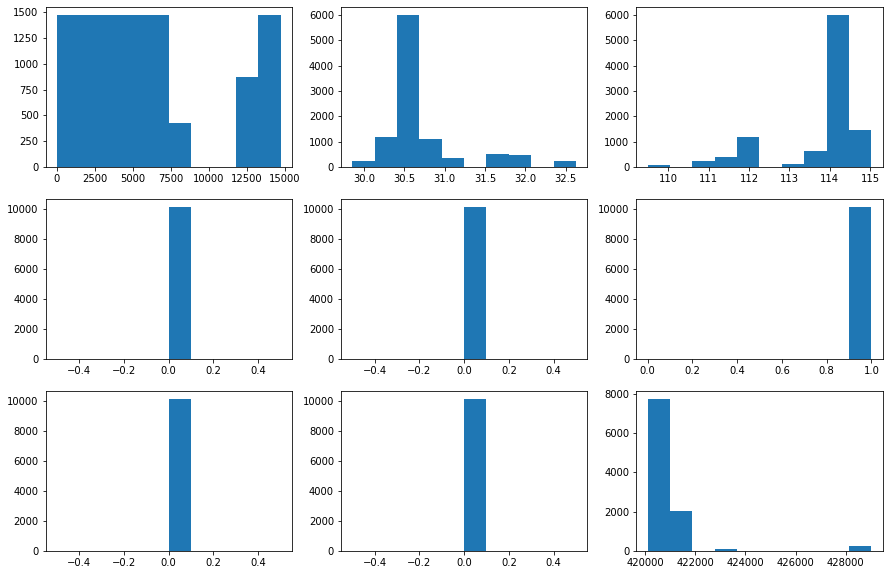

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
k = 0
while (k<3):
    for i in range(0, num_df_covid19.columns.size//3):
        axes[0][k].hist(num_df_covid19[num_df_covid19.columns[i]])
        k = k+1
l = 0
while (l<3):
    for i in range(num_df_covid19.columns.size//3, num_df_covid19.columns.size-3):
        axes[1][l].hist(num_df_covid19[num_df_covid19.columns[i]])
        l = l+1
m = 0
while (m<3):
    for i in range(num_df_covid19.columns.size-3, num_df_covid19.columns.size):
        axes[2][m].hist(num_df_covid19[num_df_covid19.columns[i]])
        m = m+1

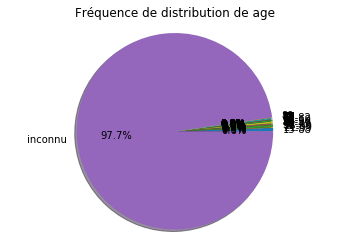

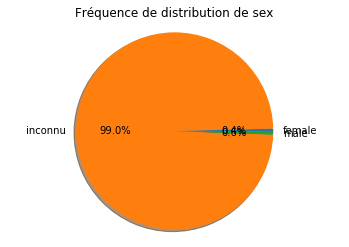

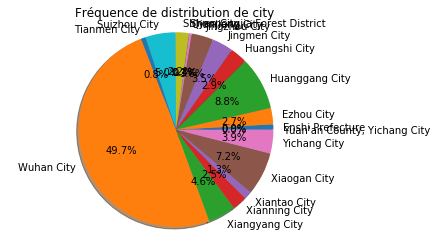

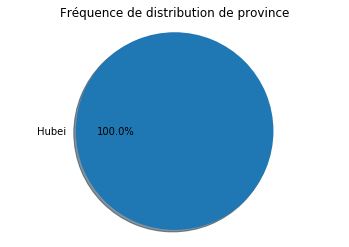

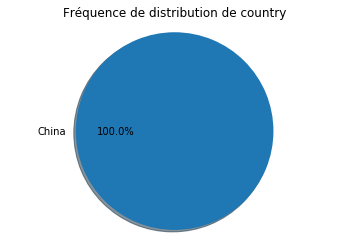

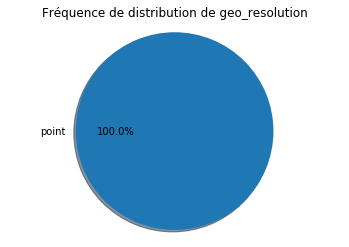

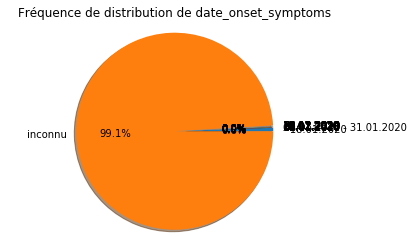

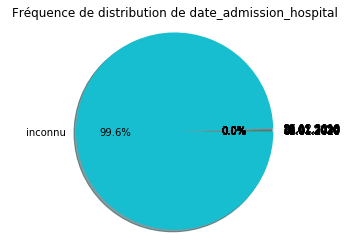

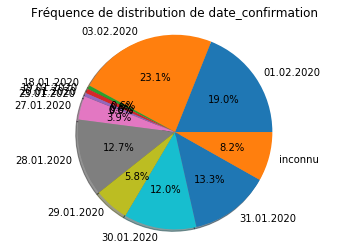

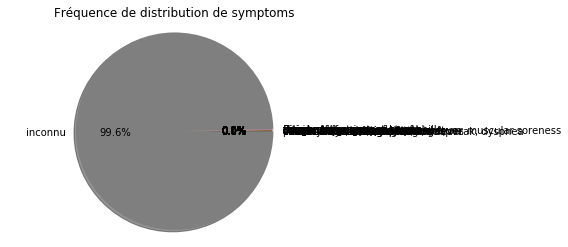

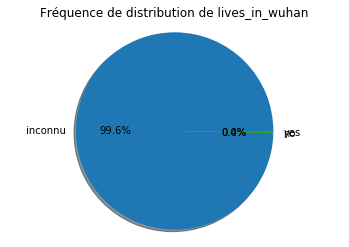

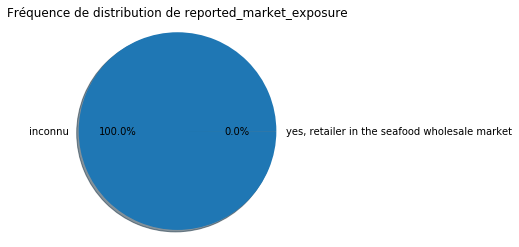

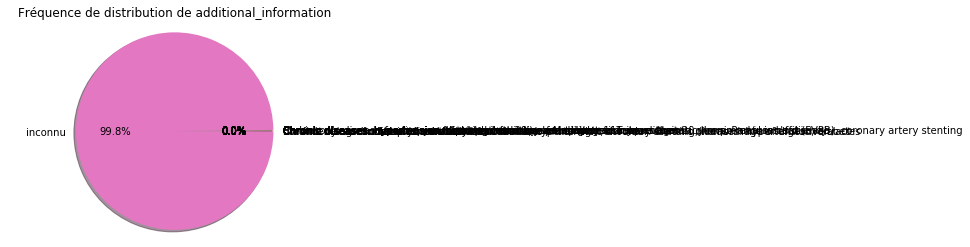

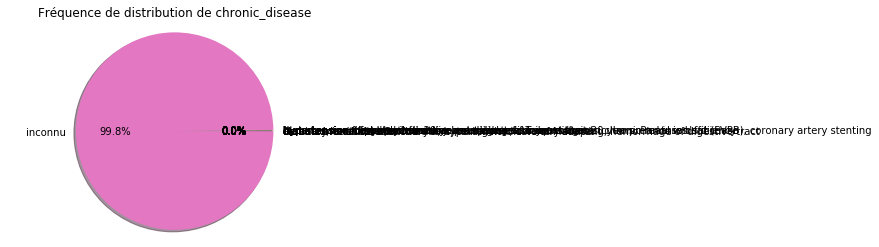

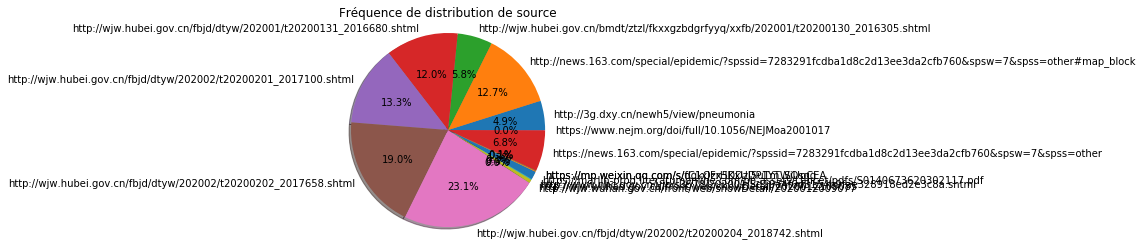

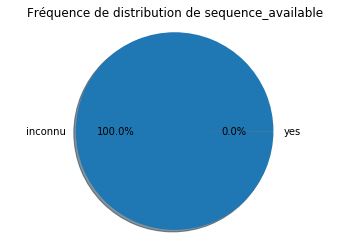

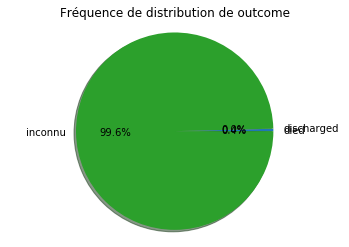

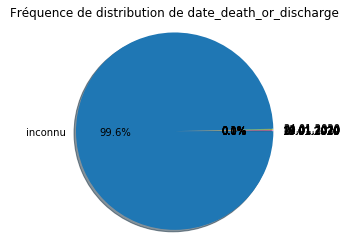

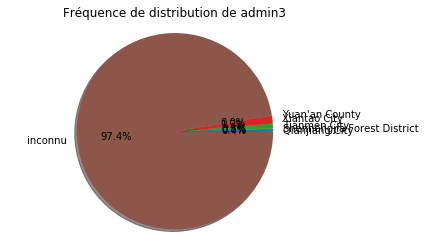

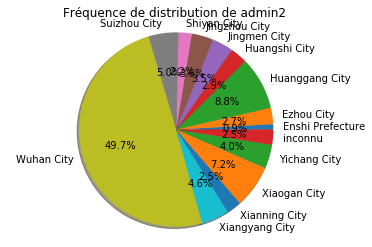

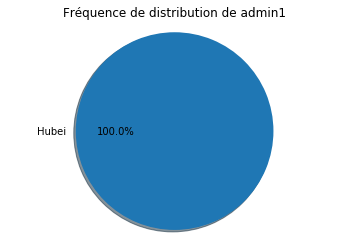

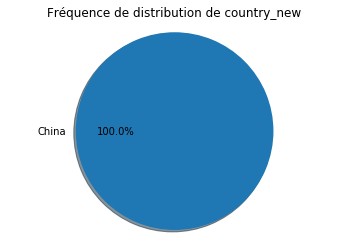

In [27]:
for i in cat_df_covid19.columns:
    labels = cat_df_covid19[i].astype('category').cat.categories.tolist()
    counts = cat_df_covid19[i].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    titre = 'Fréquence de distribution de '+i
    plt.title(titre)
    plt.show()

In [28]:
### On convertit les données de type objet en catégorie car ils sont plus rapides en temps d'exécution
for i in cat_df_covid19.columns:
    cat_df_covid19[i] = cat_df_covid19[i].astype('category')

In [29]:
cat_df_covid19.dtypes

age                         category
sex                         category
city                        category
province                    category
country                     category
geo_resolution              category
date_onset_symptoms         category
date_admission_hospital     category
date_confirmation           category
symptoms                    category
lives_in_wuhan              category
reported_market_exposure    category
additional_information      category
chronic_disease             category
source                      category
sequence_available          category
outcome                     category
date_death_or_discharge     category
admin3                      category
admin2                      category
admin1                      category
country_new                 category
dtype: object

In [30]:
# Transformation des variables catégorielles en numérique pour faciliter les traitements
lb_make = LabelEncoder()

for i in cat_df_covid19.columns:
    cat_df_covid19[i] = lb_make.fit_transform(cat_df_covid19[i])

In [31]:
# Concaténation des 2 datasets (numérique et catégorielles)
df_covid19_new = pd.concat([num_df_covid19, cat_df_covid19], axis=1)
df_covid19_new.head()

,id,latitude,longitude,travel_history_dates,travel_history_location,chronic_disease_binary,notes_for_discussion,location,admin_id,age,...,additional_information,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,admin3,admin2,admin1,country_new
0,1,30.596415,114.27978,0.0,0.0,0.954545,0.0,0.0,420100,0,...,16,16,8,0,2,10,5,8,0,0
1,2,30.596415,114.27978,0.0,0.0,0.954545,0.0,0.0,420100,0,...,16,16,8,0,2,10,5,8,0,0
2,3,30.596415,114.27978,0.0,0.0,0.954545,0.0,0.0,420100,0,...,16,16,8,0,2,10,5,8,0,0
3,4,30.596415,114.27978,0.0,0.0,0.954545,0.0,0.0,420100,0,...,16,16,8,0,2,10,5,8,0,0
4,5,30.596415,114.27978,0.0,0.0,0.954545,0.0,0.0,420100,0,...,16,16,8,0,2,10,5,8,0,0


In [32]:
# on extrait les colonnes qui n'ont 
ind_colnum_nul = np.where(df_covid19_new.mean()==0.0) #indices des colonnes dont la moyenne est nulle
nom_col_num_nul = df_covid19_new.columns[ind_colnum_nul] # nom des colonnes dont la moyenne est nulle
null_num_df_covid19 = df_covid19_new[nom_col_num_nul].head() # table des colonnes dont la moyenne est nulle
null_num_df_covid19

,travel_history_dates,travel_history_location,notes_for_discussion,location,province,country,geo_resolution,admin1,country_new
0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0,0


Une variable de moyenne nulle n'étant pas pertinent pour notre futur dataset, on va supprimer cette colonne.

In [33]:
#on va imputer des 0 les colonnes qui n'ont que de valeurs manquantes
for i in null_num_df_covid19.columns:
    #num_df_covid19[i].fillna(0, inplace = True) 
    del df_covid19_new[i]
#null_num_df_covid19.columns

In [34]:
df_covid19_new.columns

Index(['id', 'latitude', 'longitude', 'chronic_disease_binary', 'admin_id',
       'age', 'sex', 'city', 'date_onset_symptoms', 'date_admission_hospital',
       'date_confirmation', 'symptoms', 'lives_in_wuhan',
       'reported_market_exposure', 'additional_information', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'admin3', 'admin2'],
      dtype='object')

on constate bien que les variables dont la moyenne est nulle ne font plus partis des variables du dataset.

### 1. Calcul des corrélations entre les variables 

In [35]:
df_covid19_new.corr()

,id,latitude,longitude,chronic_disease_binary,admin_id,age,sex,city,date_onset_symptoms,date_admission_hospital,...,lives_in_wuhan,reported_market_exposure,additional_information,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,admin3,admin2
id,1.000000,4.027167e-02,-3.536955e-03,2.629410e-04,3.848511e-02,0.195123,-0.028132,-1.492205e-02,0.123484,0.073432,...,-0.081591,-0.013346,0.051023,0.052870,0.213417,-0.018829,0.084382,0.071737,-7.289541e-03,-5.674428e-03
latitude,0.040272,1.000000e+00,-5.479674e-01,-6.251229e-19,-3.583108e-02,0.041249,-0.006079,1.582528e-01,0.025942,0.015379,...,-0.017260,-0.002792,0.010918,0.011300,0.029198,-0.003948,0.017729,0.015083,6.717097e-02,1.422405e-01
longitude,-0.003537,-5.479674e-01,1.000000e+00,-1.948106e-17,-1.908961e-01,-0.063258,0.011885,-1.169798e-01,-0.040497,-0.020155,...,0.025015,0.004358,-0.017044,-0.017640,-0.051361,0.006163,-0.023925,-0.021778,9.527211e-02,-1.839235e-01
chronic_disease_binary,0.000263,-6.251229e-19,-1.948106e-17,1.000000e+00,1.503587e-17,0.036196,0.130953,7.944198e-18,-0.051256,-0.112186,...,-0.007537,-0.977057,-0.204980,-0.188330,-0.012696,-0.690917,-0.076919,0.179467,7.133657e-19,-9.826710e-18
admin_id,0.038485,-3.583108e-02,-1.908961e-01,1.503587e-17,1.000000e+00,0.062009,-0.009158,-7.184558e-02,0.039004,0.023094,...,-0.025937,-0.004197,0.016416,0.016989,0.034812,-0.005936,0.026628,0.022664,-8.797386e-01,1.802215e-01
age,0.195123,4.124859e-02,-6.325807e-02,3.619598e-02,6.200893e-02,1.000000,-0.098086,-5.240464e-02,0.625252,0.187345,...,-0.213668,-0.062781,0.110876,0.110257,-0.233864,-0.078695,0.221337,0.193239,-2.124835e-02,-3.523800e-02
sex,-0.028132,-6.079405e-03,1.188485e-02,1.309528e-01,-9.157838e-03,-0.098086,1.000000,5.903248e-03,-0.194317,-0.220540,...,0.251122,-0.100739,-0.193521,-0.125603,0.033550,-0.000295,-0.220255,-0.226311,5.260334e-03,3.553070e-03
city,-0.014922,1.582528e-01,-1.169798e-01,7.944198e-18,-7.184558e-02,-0.052405,0.005903,1.000000e+00,-0.032451,-0.021976,...,0.022963,0.003492,-0.013658,-0.014135,-0.053301,0.004939,-0.024843,-0.020123,-2.434458e-02,9.564555e-01
date_onset_symptoms,0.123484,2.594185e-02,-4.049678e-02,-5.125645e-02,3.900353e-02,0.625252,-0.194317,-3.245147e-02,1.000000,0.346777,...,-0.366959,-0.021918,0.285899,0.300079,-0.119630,-0.039071,0.379677,0.286131,-1.395577e-02,-2.170518e-02
date_admission_hospital,0.073432,1.537881e-02,-2.015467e-02,-1.121860e-01,2.309392e-02,0.187345,-0.220540,-2.197566e-02,0.346777,1.000000,...,-0.871909,-0.028854,0.489309,0.559320,-0.101830,-0.040808,0.876180,0.730496,-5.071780e-03,-1.533446e-02


#### - Corrélation des variables avec la cible "result". Ici result correspond à "outcome"

In [36]:
tabr = {}
for i in df_covid19_new.columns:
    if i != 'outcome':
        r = df_covid19_new[i].corr(df_covid19_new['outcome'])
        print("==> Avec ",i,": r = ",r)
        tabr[i] = r

==> Avec  id : r =  0.08438201390760053
==> Avec  latitude : r =  0.017729035872816074
==> Avec  longitude : r =  -0.023925450650179935
==> Avec  chronic_disease_binary : r =  -0.07691869640209477
==> Avec  admin_id : r =  0.026628233853835018
==> Avec  age : r =  0.22133674296290304
==> Avec  sex : r =  -0.22025518552131526
==> Avec  city : r =  -0.024843197903162785
==> Avec  date_onset_symptoms : r =  0.37967696242360566
==> Avec  date_admission_hospital : r =  0.8761799963161615
==> Avec  date_confirmation : r =  -0.07761277820782013
==> Avec  symptoms : r =  0.7731924511885523
==> Avec  lives_in_wuhan : r =  -0.9525845203178502
==> Avec  reported_market_exposure : r =  -0.07809567166506726
==> Avec  additional_information : r =  0.6151476134912037
==> Avec  chronic_disease : r =  0.634808638749941
==> Avec  source : r =  -0.12125639239880606
==> Avec  sequence_available : r =  -0.166124566579266
==> Avec  date_death_or_discharge : r =  0.8083299548909287
==> Avec  admin3 : r =  -0

In [37]:
best_correlation = []
for i in tabr:
    if tabr[i]>0.4 or tabr[i]<-0.5 :
        best_correlation.append(i)
print("Les variables les mieux correlés avec la variable outcome sont : ")
for j in best_correlation:
    print("- ",j)

Les variables les mieux correlés avec la variable outcome sont : 
-  date_admission_hospital
-  symptoms
-  lives_in_wuhan
-  additional_information
-  chronic_disease
-  date_death_or_discharge


### 2. Visualisez les données en deux dimensions en passant par l’ACP (analyse en composantes principales). Pouvez-vous utiliser une autre méthode ?

In [38]:
pca = decomposition.PCA(n_components=2)
pca.fit(df_covid19_new)
covid19_pca = pca.transform(df_covid19_new)
covid19_pca

array([[-6137.4661953 ,  -519.86351923],
       [-6136.46628536,  -519.87692174],
       [-6135.46637542,  -519.89032425],
       ...,
       [ 8706.78064828,  8202.97844893],
       [ 8707.78055822,  8202.96504642],
       [ 8708.78046816,  8202.95164392]])

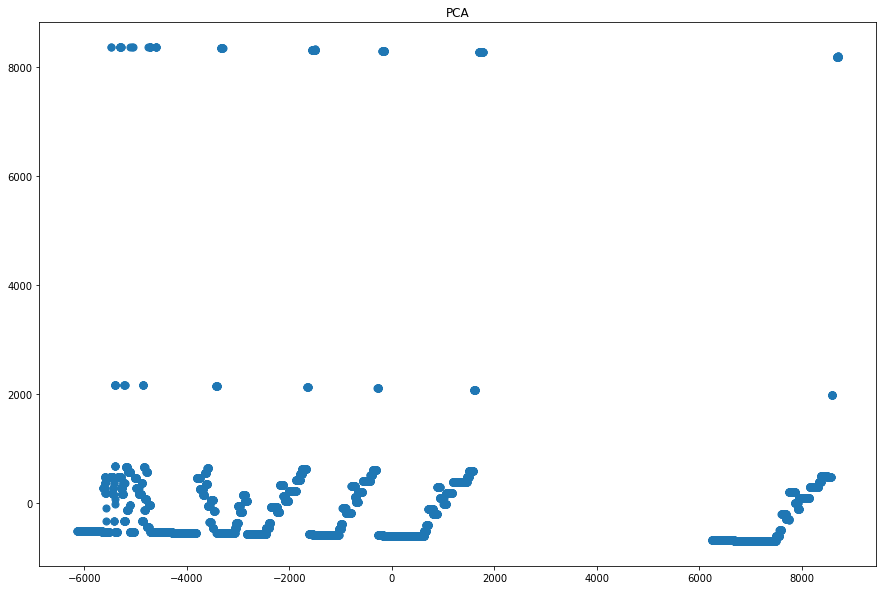

In [39]:
plt.figure(figsize=(15,10))
#titre = i, j
#plt.subplot(n, n, compteur)
plt.title("PCA")
plt.scatter(covid19_pca[:,0], covid19_pca[:,1],  s=50, cmap='viridis')

In [40]:
df_covid19_new['outcome'].unique()

array([2, 1, 0])

In [41]:
df_covid19_new['outcome'].value_counts()

2    10093
0       40
1        2
Name: outcome, dtype: int64

Dans la suite, nous avons choisi de travailler avec la méthode d'apprentissage automatique KNN afin de prédire la classe : les patients sont soit sont soit «décédés» (‘died’) soit «sortis» (‘discharged’) de l'hôpital.
La variable qui représente cette classe c'est la variable "outcome". Cette variable a 3 valeurs uniques 0 "died", 1 "discharged" et 2 "Nan". Les valeurs "Nan" correspondent aux valeurs "discharged". On va donc remplacer 2 par 1 dans la variable "outcome".

In [42]:
# on remplace 2 par 1
df_covid19_new['outcome'] = df_covid19_new['outcome'].replace([2],1)

In [43]:
df_covid19_new['outcome'].value_counts()

1    10095
0       40
Name: outcome, dtype: int64

### 3. Les résultats obtenus doivent être validés en utilisant certains indices externes comme l’erreur de prédiction (matrice de confusion et précision) ou d'autres comme Rappel, F-Measure, ...

In [44]:
# Définir la classe
df_covid19_pred = df_covid19_new.copy()
Y = df_covid19_pred['outcome']
Y = Y.values
Y

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
# On supprime cette colonne du dataset pour ne travailler qu'avec les colonnes à prédire la classe
del df_covid19_pred['outcome']

In [46]:
# Vecteur à prédire les classes
X = df_covid19_pred
X = X.values
X

array([[1.0000000e+00, 3.0596415e+01, 1.1427978e+02, ..., 1.0000000e+01,
        5.0000000e+00, 8.0000000e+00],
       [2.0000000e+00, 3.0596415e+01, 1.1427978e+02, ..., 1.0000000e+01,
        5.0000000e+00, 8.0000000e+00],
       [3.0000000e+00, 3.0596415e+01, 1.1427978e+02, ..., 1.0000000e+01,
        5.0000000e+00, 8.0000000e+00],
       ...,
       [1.4727000e+04, 3.1583333e+01, 1.1050000e+02, ..., 1.0000000e+01,
        1.0000000e+00, 1.3000000e+01],
       [1.4728000e+04, 3.1583333e+01, 1.1050000e+02, ..., 1.0000000e+01,
        1.0000000e+00, 1.3000000e+01],
       [1.4729000e+04, 3.1583333e+01, 1.1050000e+02, ..., 1.0000000e+01,
        1.0000000e+00, 1.3000000e+01]])

On constate évidemment qu'on a une colonne en moins.

On divise les données en 2 morceaux. L'un sera utilisé pour entrainer nos données et l'autre sera utilisé pour tester les résultats de notre modèle. Les attributs test seront  les nouvelles observations et les labels prédites seront comparés avec les labels de l'ensemble de test.

In [47]:
# on divise le dataset en ensemble d'entrainement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [48]:
#On standardise les données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### - Entrainement du modèle.

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

#### - Prédiction du label

In [50]:
y_pred = knn.predict(X_test)
np.unique(y_pred)

array([0, 1])

#### - Evaluation du modèle

Un meilleur moyen d'évaluer la performance d'un classifieur est de calculer sa matrice de confusion. L'idée générale est de compter le nombre de fois les instance de classe A sont classifiés comme classe B.

In [51]:
# Matrice de confusion
mat_conf = confusion_matrix(y_test, y_pred)
mat_conf

array([[   7,    1],
       [   2, 2524]])

Chaque ligne dans cette matrice représente la classe d'origine et chaque colonne la classe prédite.

On a 7 TN, 1 FP, 2 FN et 2524 TP

In [52]:
# calcul de la précision
# la précision = (TP/(TP+FP))
precision = precision_score(y_test, y_pred)
round(precision*100, 2)

99.96

La précision est de 99,96 %.

### 4. Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la prédiction à l'aide de l'erreur MSE (Mean Squared Error).

In [53]:
#calcul de la corrélation de la variable "age" avec d'autres variables
tabr = {}
for i in df_covid19_new.columns:
    if i != 'age':
        r = df_covid19_new[i].corr(df_covid19_new['age'])
        print("==> Avec ",i,": r = ",r)
        tabr[i] = r

==> Avec  id : r =  0.19512269231298102
==> Avec  latitude : r =  0.0412485870938242
==> Avec  longitude : r =  -0.06325807081089727
==> Avec  chronic_disease_binary : r =  0.036195983182509404
==> Avec  admin_id : r =  0.06200893341028753
==> Avec  sex : r =  -0.09808558010022911
==> Avec  city : r =  -0.0524046398696001
==> Avec  date_onset_symptoms : r =  0.625251901326934
==> Avec  date_admission_hospital : r =  0.18734504946151714
==> Avec  date_confirmation : r =  0.047790554732941574
==> Avec  symptoms : r =  0.18488736296021946
==> Avec  lives_in_wuhan : r =  -0.2136678219581748
==> Avec  reported_market_exposure : r =  -0.06278079267987824
==> Avec  additional_information : r =  0.11087636663599997
==> Avec  chronic_disease : r =  0.11025653201207909
==> Avec  source : r =  -0.2338640835754831
==> Avec  sequence_available : r =  -0.07869468065679003
==> Avec  outcome : r =  0.21199965243027308
==> Avec  date_death_or_discharge : r =  0.19323937675370015
==> Avec  admin3 : r = 

In [54]:
best_correlation = []
for i in tabr:
    if tabr[i]>0.4 or tabr[i]<-0.5 :
        best_correlation.append(i)
print("Les variables les mieux correlés avec la variable age sont : ")
for j in best_correlation:
    print("- ",j)

Les variables les mieux correlés avec la variable age sont : 
-  date_onset_symptoms


date_onset_symptoms est la variable explicative choisi pour prédire la variable "age" parce qu'elle est la mieux correlée avec cette dernière.

In [55]:
X = df_covid19_new['age'].values.reshape(-1,1)
y = df_covid19_new['date_onset_symptoms'].values.reshape(-1,1)
lm = LinearRegression()
model = lm.fit(X,y)
y_predi = lm.predict(X)
print("La prédiction de l'âge est :")
print(y_predi)
#print("L'équation de la regression linear est: Y = {:.5} + {:.5}X".format(reg_linear.intercept_[0], reg_linear.coef_[0][0]))

La prédiction de l'âge est :
[[12.13896547]
 [12.13896547]
 [12.13896547]
 ...
 [20.9994062 ]
 [20.9994062 ]
 [20.9994062 ]]


In [56]:
#calcul de la qualité de la prédiction
lm.score(X,y)

0.3909399401129434

cette valeur indique que la prédiction n'est pas parfaite.

In [57]:
# calcul de l'erreur MSE
mean_squared_error(y, y_predi)

1.8442165515662228

In [58]:
#RMSE=np.sqrt(((y-reg_linear.predict(x))**2).sum()/len(y))
#print(RMSE)
#La valeur de RMSE est bien.En effet plus le RMSE est grand, plus la différence entre les valeurs prédites et observées est grande,
#ce qui signifie que plus un modèle correspond aux données. 
#Inversement, plus le RMSE est petit, meilleur est un modèle capable d’adapter les données

### 5. Application de trois méthodes de clustering (K-means,  NMF et CAH)  sur  l'ensemble  de  données  pour segmenter  les  personnes  en  différents  groupes.  On utilisera  l'index de Silhouette  pour  connaître  le  meilleur nombre de clusters. 

In [54]:
df_covid19_clust = df_covid19_new.copy()
X = df_covid19_clust.drop(['outcome'], 1)
X = X.values
y = df_covid19_clust['outcome']
y = y.values
# on divise le dataset en ensemble d'entrainement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Standardisation des données
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
X_train

array([[5.52700000e+03, 3.09178000e+01, 1.13957000e+02, ...,
        1.00000000e+01, 5.00000000e+00, 1.10000000e+01],
       [6.00400000e+03, 3.05964150e+01, 1.14279780e+02, ...,
        1.00000000e+01, 5.00000000e+00, 8.00000000e+00],
       [5.01100000e+03, 3.05964150e+01, 1.14279780e+02, ...,
        1.00000000e+01, 5.00000000e+00, 8.00000000e+00],
       ...,
       [3.26500000e+03, 3.04000000e+01, 1.14833333e+02, ...,
        1.00000000e+01, 5.00000000e+00, 1.00000000e+00],
       [1.44400000e+04, 3.04537000e+01, 1.14872200e+02, ...,
        1.00000000e+01, 5.00000000e+00, 2.00000000e+00],
       [2.73300000e+03, 3.05964150e+01, 1.14279780e+02, ...,
        1.00000000e+01, 5.00000000e+00, 8.00000000e+00]])

### - k-means

In [55]:
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#    kmeans.fit(X_train)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()
#Le nombre de clusters optimum c'est 2.

In [56]:
# Application de kmeans sur l'ensemble des données
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
print(accuracy_score(y_train, pred_y))

0.23299565846599132


### - NMF

In [57]:
model = NMF(n_components=3)
W = model.fit_transform(X_train)
H = model.components_
W

array([[69.49474129,  4.72826   ,  0.27510473],
       [69.36270798,  5.15481934,  0.14324342],
       [69.36267366,  4.28080464,  0.22588923],
       ...,
       [69.46179379,  2.76347965,  0.09590962],
       [69.52787748, 12.54001354,  0.        ],
       [69.36266883,  2.28841878,  0.23762146]])

### - CAH (Classification ascendante hierarchique)

In [58]:
# Segmentation à l'aide d'une CAH
y_pred = AgglomerativeClustering(n_clusters = 3).fit_predict(X_train)
print(accuracy_score(y_train, y_pred))

0.22878568609393501


#### - Déterminination du meilleur nombre de clusters

In [59]:
best_result=0
Nb_clusters=0

for i in range(2, 10) :
    resultat = silhouette_score(X_train, y_train, metric='euclidean')
    if resultat > best_result:
        best_result=resultat
        Nb_clusters=i
print('Le meilleur score est:',best_result)
print('Il correspond au nombre de clusters ',Nb_clusters)

Le meilleur score est: 0
Il correspond au nombre de clusters  0


### 6. Visualisation des résultats 

In [61]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

#### - KMeans

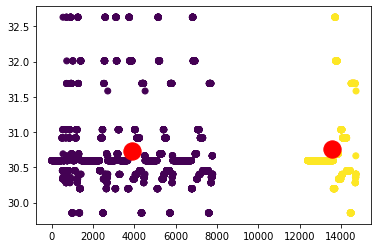

In [62]:
# Application de kmeans sur l'ensemble des données
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

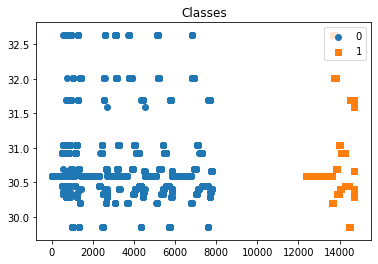

In [63]:
plot_2d_space(X_train, pred_y)

#### - NMF

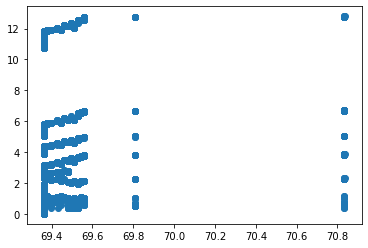

In [64]:
model = NMF(n_components=2)
W = model.fit_transform(X_train)
H = model.components_
plt.scatter(W[:,0],W[:,1])

#### - CAH

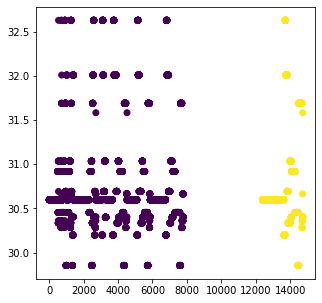

In [65]:
# Segmentation à l'aide d'une CAH
y_pred = AgglomerativeClustering(n_clusters = 2).fit_predict(X_train)
plt.figure(figsize = (5,5))
plt.scatter(X_train[:,0],X_train[:,1],c = y_pred);

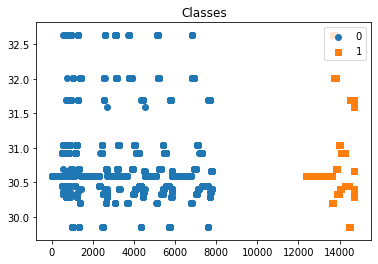

In [66]:
plot_2d_space(X_train, y_pred)

### 7.

In [67]:
[print('Class {} has {} instances'.format(label, count))
 for label, count in zip(*np.unique(y_train, return_counts=True))]

Class 0 has 32 instances
Class 1 has 7569 instances


[None, None]

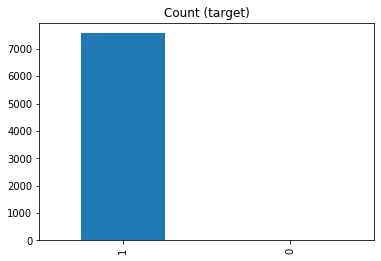

In [68]:
# on convertit la y_train en dataframe
y_equi = pd.DataFrame(y_train, columns=['label'])
y_equi['label'].value_counts()
#y_pred_kmeans.value_counts().plot(kind='bar', title='Count (target)')
y_equi['label'].value_counts().plot(kind='bar', title='Count (target)')

on remarque bien le déséquilibre entre ces 2 classes. La classe "0" a 32 éléments et la classe "1" a 7569.

### 8. Comment pouvez-vous mieux gérer ce déséquilibre entre les classes ?

#### - Reduction aléatoire de la classe majoritaire en sorte qu'elle soit égale à la classe minoritaire.

L'extraction aléatoire des échantillons équilibré implique la création d'un nouvel ensemble de données dans lequel les échantillons sélectionnés ont une distribution de classe différente.
Il y a 2 approches principâle pour réchantilloner aléatoirement un dataset dont les classes sont déséquilibrées. Il y a "oversampling" et "undersampling". 
- Random oversampling consiste à dupliquer aléatoirement les échantillons dans la classe minoritaire
- Random Undersampling consiste à supprimer les échantillons dans la classe majoritaire
Dans la suite nous avons choisi de travailler avec la stratégie "Random undersampling"

In [69]:
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

print('Les index des données supprimés sont :', id_rus)

#plot_2d_space(X_rus, y_rus, 'Random under-sampling')
[print('La classe {} a {} instances '.format(label, count))
 for label, count in zip(*np.unique(y_rus, return_counts=True))]

Les index des données supprimés sont : [  33  125  546  722  731  734 1193 1470 1556 1708 1728 1956 2050 2093
 2122 2491 2763 4191 4640 4831 4959 5040 5061 5134 5448 5540 6163 6388
 6580 6938 6947 7236 2382 7430 4864 3059 5627 1759 4972 7354 3293 6810
 3022 3956 6697 1652 7234 2556 6034 4523 7383 1519 6157 4294 3713 3988
 2317 1323 3787  264  405 3148 6916 4691]
La classe 0 a 32 instances 
La classe 1 a 32 instances 


[None, None]

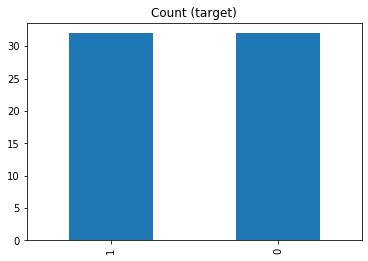

In [70]:
# on convertit la y_train en dataframe
y_equi = pd.DataFrame(y_rus, columns=['label'])
y_equi['label'].value_counts()
#y_pred_kmeans.value_counts().plot(kind='bar', title='Count (target)')
y_equi['label'].value_counts().plot(kind='bar', title='Count (target)')

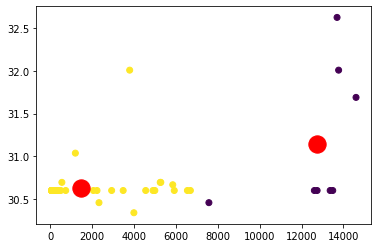

In [71]:
# Application de kmeans sur l'ensemble des données
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_rus)
plt.scatter(X_rus[:,0], X_rus[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [72]:
print(accuracy_score(y_rus, pred_y))

0.375


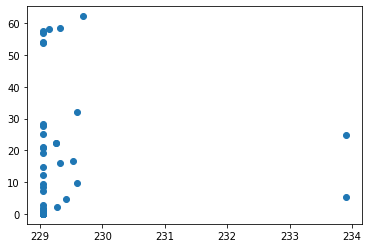

In [73]:
# Application de la NMF
model = NMF(n_components=2)
W = model.fit_transform(X_rus)
H = model.components_
plt.scatter(W[:,0],W[:,1])

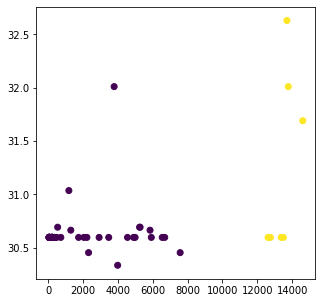

In [74]:
# Segmentation à l'aide d'une CAH
y_pred = AgglomerativeClustering(n_clusters = 2).fit_predict(X_rus)
plt.figure(figsize = (5,5))
plt.scatter(X_rus[:,0],X_rus[:,1],c = y_pred);

In [75]:
print(accuracy_score(y_rus, y_pred))

0.609375


On constate évidemment que l'extraction aléatoire des échantillons équilibrés a amélioré la distribution des données dans chacune des classes puisque les précisions sont meilleures. Les résultats de la prédiction ont changé tels que le déséquilibre n'est plus très grand entre la distribution  des données dans les 2 classes. Mais ce n'est toujours pas parfait.

### 9. Pour trouver les meilleurs paramètres pour les modèles, l'algorithme Greedy Search peut être utilisé, disponible dans la bibliothèque scikit-learn. Expliquez l'algorithme et utilisez-le pour les modèles d'apprentissage choisis afin de trouver les meilleurs paramètres.

Le principe de l'algorithme Greedy Search est de Construire au fur et à mesure une solution en faisant les choix qui paraissent optimaux localement. Dans certains cas, cela donnera finalement la meilleure solution: on parlera d’algorithmes gloutons exacts. Dans d’autres, non, on parlera d’heuristiques gloutonnes.
Ceci est important car les performances de l'ensemble d'un modèle donné sont basées sur les valeurs d'hyper paramètre spécifiées.